In [48]:
import os

In [49]:
log_dir = 'logs\\'

iterations = []

iteration_string = 'Iteration'
test1_string = 'Testing net (#0)'
test2_string = 'Testing net (#1)'

In [50]:
for filename in os.listdir(log_dir):
    log_train_iterations = []
    log_test1_iterations = []
    log_test2_iterations = []
    with open(log_dir + filename, 'r') as log_file:
        lines = log_file.readlines()
        for line_index in range(0, len(lines), 4):
            line = lines[line_index]
            index_iteration = line.find(iteration_string)
            
            iteration = -1
            if index_iteration != -1:
                line_from_iterations = line[index_iteration + len(iteration_string) + 1:]
                index_comma = line_from_iterations.find(',')
                iteration = int(line_from_iterations[: index_comma])
                
                phase = line_from_iterations[index_comma + 2: -1]
                
                if phase == test1_string:
                    line_with_loss = lines[line_index + 3]
                    loss = float(line_with_loss[line_with_loss.find('=') + 2:-1])
                    
                    log_test1_iterations.append((iteration, loss))
                    
                elif phase == test2_string:
                    line_with_loss = lines[line_index + 3]
                    loss = float(line_with_loss[line_with_loss.find('=') + 2:-1])
                    
                    log_test2_iterations.append((iteration, loss))
                else:
                    line_with_loss = lines[line_index + 2]
                    loss = float(line_with_loss[line_with_loss.find('=') + 2:-1])
                    
                    log_train_iterations.append((iteration, loss))
    iterations.append((filename, log_train_iterations, log_test1_iterations, log_test2_iterations))

In [51]:
print iterations

[('log.txt', [(0, 59.8545), (100, 21.4574), (200, 21.5929), (300, 21.3886), (400, 21.1958), (500, 19.5639), (600, 18.733), (700, 18.9801), (800, 17.8896), (900, 16.8062), (1000, 16.9937), (1100, 16.3781), (1200, 16.0712), (1300, 16.9701), (1400, 16.0127), (1500, 16.1947), (1600, 15.8783), (1700, 15.6295), (1800, 15.3831), (1900, 15.4568), (2000, 15.2878), (2100, 15.7818), (2200, 14.7509), (2300, 15.2637), (2400, 15.3841)], [(500, 19.5388), (1000, 17.0664), (1500, 16.1264), (2000, 15.5436), (2500, 15.2011)], [(0, 60.0073), (500, 19.588), (1000, 17.2056), (1500, 16.288), (2000, 15.7419), (2500, 15.397)]), ('log_pretrained.txt', [(0, 50.5276), (100, 18.3718), (200, 17.6739), (300, 16.725), (400, 16.5587), (500, 15.5794), (600, 14.7213), (700, 15.6458), (800, 14.8802), (900, 14.3396), (1000, 14.617), (1100, 14.2488), (1200, 14.1169), (1300, 15.1724), (1400, 14.1571), (1500, 14.4544), (1600, 14.3107), (1700, 13.7314), (1800, 13.7925), (1900, 13.7001), (2000, 13.9515), (2100, 14.6513), (2200

In [32]:
print log_test1_iterations

[(500, 19.5388), (1000, 17.0664), (1500, 16.1264), (2000, 15.5436), (2500, 15.2011)]


In [33]:
import matplotlib.pyplot as plt

In [40]:
train_iterations, train_losses = zip(*log_train_iterations)
test1_iterations, test1_losses = zip(*log_test1_iterations)
test2_iterations, test2_losses = zip(*log_test2_iterations)

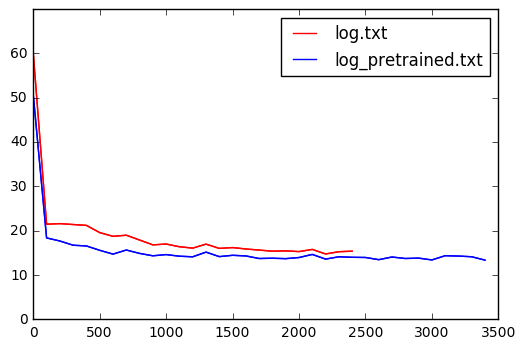

In [58]:
colors = ['r', 'b', 'g']

max_iterations = []
max_train_losses = []
lines = []
for index in range(len(iterations)):
    train_iterations, train_losses = zip(*iterations[index][1])
    line, = plt.plot(train_iterations, train_losses, colors[index], label=iterations[index][0])
    lines.append(line)
    max_iterations.append(max(train_iterations))
    max_train_losses.append(max(train_losses))

plt.legend(handles=lines)
plt.axis([0, max(max_iterations) + 100, 0, max(max_train_losses) + 10])
plt.show()

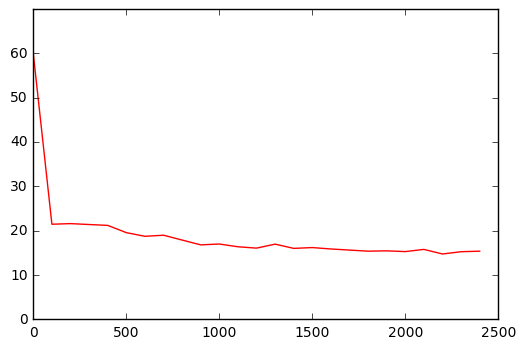

In [44]:
plt.plot(train_iterations, train_losses, 'r')
#plt.plot(test1_iterations, test1_losses, 'b')
#plt.plot(test2_iterations, test2_losses, 'g')
plt.axis([0, max(train_iterations) + 100, 0, max(train_losses) + 10])
plt.show()